<a href="https://colab.research.google.com/github/MrNoby47/school-audit/blob/main/binary_classification_keras_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as  plt
from  sklearn import datasets
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

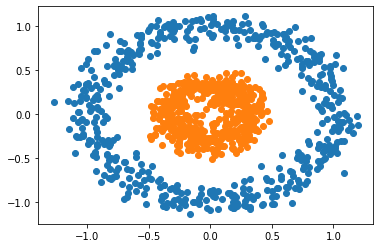

In [ ]:
nb_pts= 1000
np.random.seed(0)
X,y = datasets.make_circles(n_samples = nb_pts, noise=0.1, random_state = 123, factor=0.3)
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

In [ ]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x = X, y=y, verbose=1, batch_size = 50, epochs= 100, shuffle ='true')

Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 0.7211 - accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5080
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5010
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5040
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.4980
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5520
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5040
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.6000
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.5940
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.6700
Epoch 11/

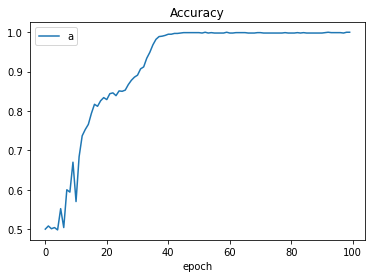

In [ ]:
plt.plot(h.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend('acc')

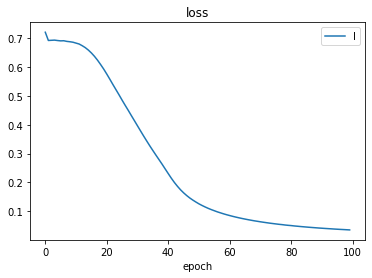

In [ ]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend('l')


In [ ]:
def prob_boundaries(X,y,model):
  x_axis = np.linspace(min(X[:, 0]) - 0.2, max(X[:,0]) + 0.2)
  y_axis = np.linspace(min(X[:, 1]) -0.2 , max(X[:, 1]) + 0.2)
  xa, ya = np.meshgrid(x_axis,y_axis) #set up a matrix nb_axis*nb_axis
  xa_ , ya_ = xa.ravel(), ya.ravel() #reshape it one dimension array
  grid = np.c_[xa_,ya_] 
  prediction = model.predict(grid) #makes prediction
  prob_grid = prediction.reshape(xa.shape)
  plt.contourf(xa,ya,prob_grid)



79/79 [==============================] - 0s 1ms/step


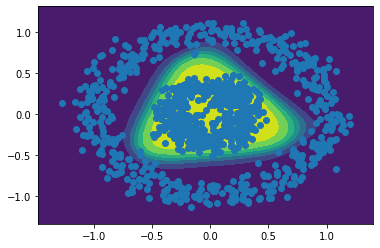

In [ ]:
prob_boundaries(X,y,model)
plt.scatter(X[:nb_pts, 0], X[:nb_pts, 1])
plt.scatter(X[nb_pts:, 0], X[nb_pts:, 1])